In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from Index import Index
from Weighter import WeighterVector
from IRModel import Vectoriel, LanguageModel, BM25Model
from GridSearch import GridSearch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()
weighter = WeighterVector(index)
#weighter.calculeNorms()
#model = Vectoriel(weighter)
bm25_model = BM25Model(weighter)
language_model = LanguageModel(weighter)

In [22]:
search = GridSearch(param_a_name="k1", param_a_values=[1.625,1.75,1.875,2], param_b_name="b", param_b_values=[0.65,0.75,0.85, 0.95, 1])
results = search.search(bm25_model)
bm25_results = np.array(results)

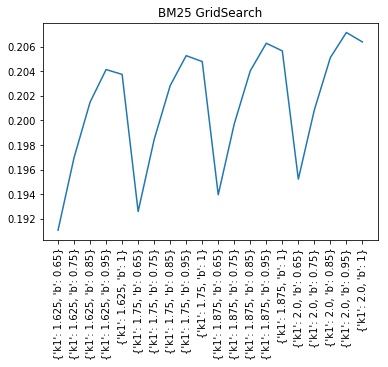

In [28]:
x_ax = np.arange(bm25_results.shape[0])
plt.title("BM25 GridSearch")
plt.plot(x_ax, bm25_results[:,1])
plt.xticks(x_ax,[str(d) for d in bm25_results[:,0]], rotation='vertical');

Pour le modéle BM25 les meilleurs paramètres cemblent d'être k1=2 et b=0.95. On a utilisé precion moyenne comme metrique.

In [35]:
lambda_values = np.linspace(0,1,20)
search = GridSearch(param_a_name="lambd", param_a_values=lambda_values)
results = search.search(language_model)
lang_results = np.array(results)

/home/samutamm/Documents/Study/Sorbonne/RI/RI/IRModel.py:84: RuntimeWarning: divide by zero encountered in log
  score_absents += tw4q[stem] * np.log((1-lambd)*(tf_t_c/l_c))


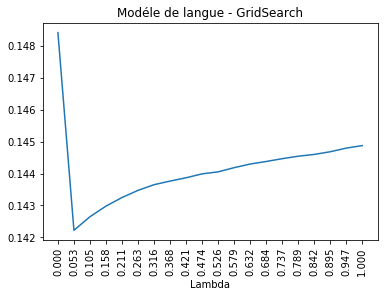

In [39]:
lambda_values = np.linspace(0,1,20)
plt.title("Modéle de langue - GridSearch")
plt.plot(lambda_values, lang_results[:,1])
plt.xlabel("Lambda")
plt.xticks(lambda_values, rotation='vertical');

Pour modéle de langue, le meilleur valeur de lambda est soit 0, soit 1